<a href="https://colab.research.google.com/github/DiegoBrito17/Analise-de-dados/blob/main/AnaliseEstatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importação das bibliotecas essenciais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Carregando os dados
df=pd.read_csv('/content/salario_profissionais_dados.csv')

In [ ]:
df.head()

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5
2,2023,United States of America,Americas,MI,ML Engineer,25500,US,US,S,3
3,2023,Canada,Americas,SE,Data Scientist,175000,CA,CA,M,8
4,2023,Canada,Americas,SE,Data Scientist,120000,CA,CA,M,8


In [ ]:
#Quais colunas estão disponíveis?
print(df.columns)


Index(['work_year', 'country', 'region', 'experience_level', 'job_title',
       'salary_in_usd', 'employee_residence', 'company_location',
       'company_size', 'years_of_experience'],
      dtype='object')


In [ ]:
#Quantas linhas existem?
contagem_linhas=df.shape[0]
print(f'A quantidade de linhas é de: {contagem_linhas}')

A quantidade de linhas é de: 3755


In [ ]:
#Existem dados ausentes?
df.isnull().sum()

,0
work_year,0
country,0
region,0
experience_level,0
job_title,0
salary_in_usd,0
employee_residence,0
company_location,0
company_size,0
years_of_experience,0


In [ ]:
# Quais são os tipos de variáveis?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


In [ ]:
#- Cargos mais comuns
df['job_title'].value_counts().head(10)

,count
job_title,
Data Engineer,1040
Data Scientist,840
Data Analyst,612
Machine Learning Engineer,289
Analytics Engineer,103
Data Architect,101
Research Scientist,82
Applied Scientist,58
Data Science Manager,58


In [ ]:
df['job_title'].value_counts(normalize=True).head(10)

,proportion
job_title,
Data Engineer,0.276964
Data Scientist,0.223702
Data Analyst,0.162983
Machine Learning Engineer,0.076964
Analytics Engineer,0.027430
Data Architect,0.026897
Research Scientist,0.021838
Applied Scientist,0.015446
Data Science Manager,0.015446


In [ ]:
#- Nível de experiência
df['experience_level'].value_counts().head(10)

,count
experience_level,
SE,2516
MI,805
EN,320
EX,114


In [ ]:
df['experience_level'].value_counts(normalize=True).head(10)

,proportion
experience_level,
SE,0.670040
MI,0.214381
EN,0.085220
EX,0.030360


In [ ]:
#- Tamanho da empresa
df['company_size'].value_counts().head(10)

,count
company_size,
M,3153
L,454
S,148


In [ ]:
df['company_size'].value_counts(normalize=True).head(10)


,proportion
company_size,
M,0.839680
L,0.120905
S,0.039414


In [ ]:
#Medidas de tendência central: média, mediana
tendencia_central = df.groupby('company_size')['salary_in_usd'].agg(['mean', 'median'])
print(tendencia_central )


                       mean    median
company_size                         
L             118300.982379  108500.0
M             143130.548367  140000.0
S              78226.682432   62146.0


In [ ]:
#Medidas de dispersão:** desvio padrão, mínimo e máximo
medidas_dispersão =df.groupby('company_size')['salary_in_usd'].agg(['std','min', 'max'])
print(medidas_dispersão)

                       std   min     max
company_size                            
L             75832.391505  5409  423834
M             58992.813382  5132  450000
S             61955.141792  5679  416000


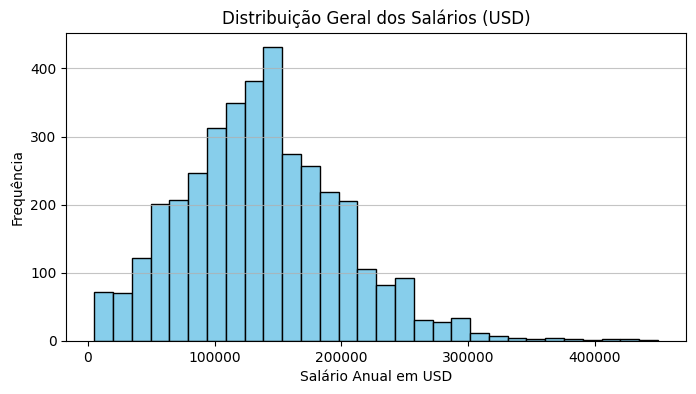

In [ ]:
#Distribuição geral:** através de histogramas
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(df['salary_in_usd'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição Geral dos Salários (USD)')
plt.xlabel('Salário Anual em USD')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.show()



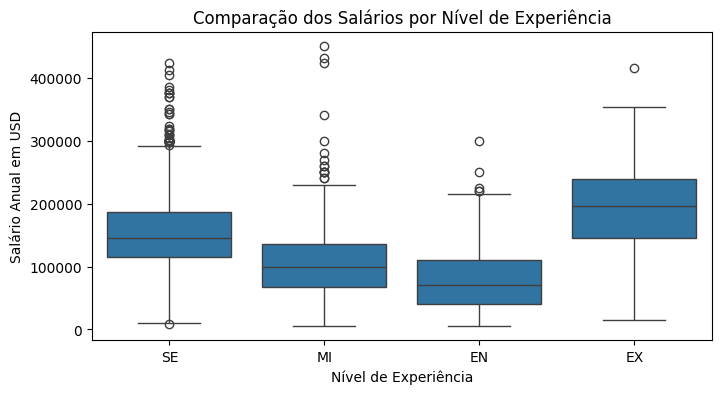

In [ ]:
#Comparações por grupos:** especialmente por nível de experiência (usando boxplots)
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')

plt.title('Comparação dos Salários por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário Anual em USD')
plt.show()


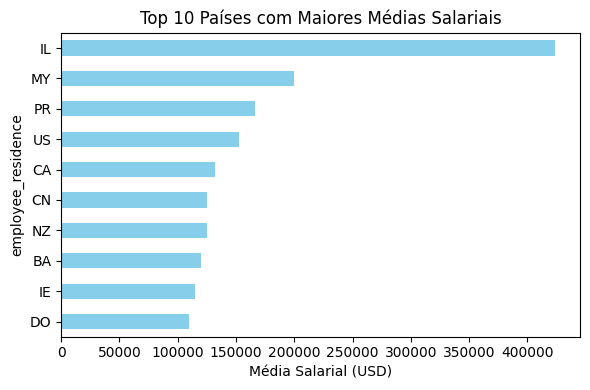

In [ ]:
#Verificar os 10 países com as maiores médias salariais
top_paises=df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(6,4))
top_paises.plot(kind='barh',color='skyblue')
plt.xlabel('Média Salarial (USD)')
plt.title('Top 10 Países com Maiores Médias Salariais')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
#- Existe alguma **tendência de aumento salarial com os anos?**
#- Quanto maior o tempo de experiência, maior o salário?


# Selecionando as variáveis relevantes
variaveis = ['salary_in_usd', 'work_year', 'years_of_experience']

# Criando a matriz de correlação
correlacao = df[variaveis].corr()

# Exibindo a matriz
print(correlacao)



                     salary_in_usd  work_year  years_of_experience
salary_in_usd             1.000000   0.228290             0.410723
work_year                 0.228290   1.000000             0.178878
years_of_experience       0.410723   0.178878             1.000000


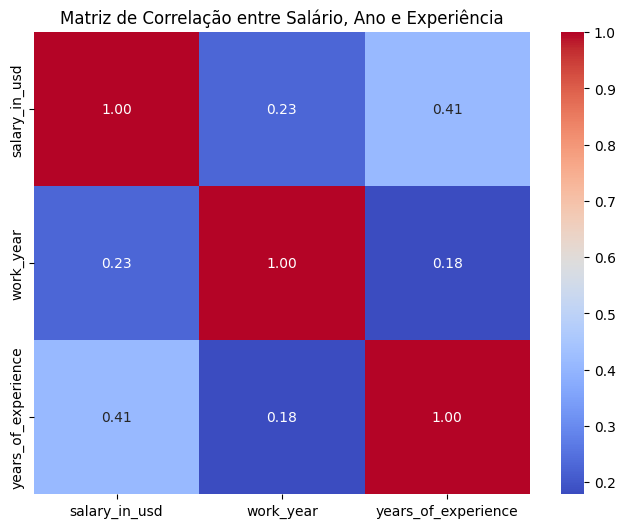

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Salário, Ano e Experiência')
plt.show()
